In [45]:
!pip install pandas

In [30]:
!pip install numpy

In [31]:
!pip install scikit-learn

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [97]:
from warnings import filterwarnings
filterwarnings(action="ignore")

In [98]:
data = pd.read_csv("winequality-red.csv")

In [110]:
data.sample(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1161,8.8,0.450,0.43,1.4,0.076,12.0,21.0,0.99551,3.21,0.75,10.2,6
590,9.0,0.450,0.49,2.6,0.084,21.0,75.0,0.99870,3.35,0.57,9.7,5
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7,6
1190,9.1,0.400,0.57,4.6,0.080,6.0,20.0,0.99652,3.28,0.57,12.5,6
1065,7.7,0.610,0.18,2.4,0.083,6.0,20.0,0.99630,3.29,0.60,10.2,6
85,6.9,0.550,0.15,2.2,0.076,19.0,40.0,0.99610,3.41,0.59,10.1,5
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
609,6.3,0.360,0.19,3.2,0.075,15.0,39.0,0.99560,3.56,0.52,12.7,6
1048,9.3,0.490,0.36,1.7,0.081,3.0,14.0,0.99702,3.27,0.78,10.9,6
1035,10.1,0.370,0.34,2.4,0.085,5.0,17.0,0.99683,3.17,0.65,10.6,7


In [111]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [112]:
y=data['quality']
x=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]

<Axes: xlabel='quality', ylabel='Density'>

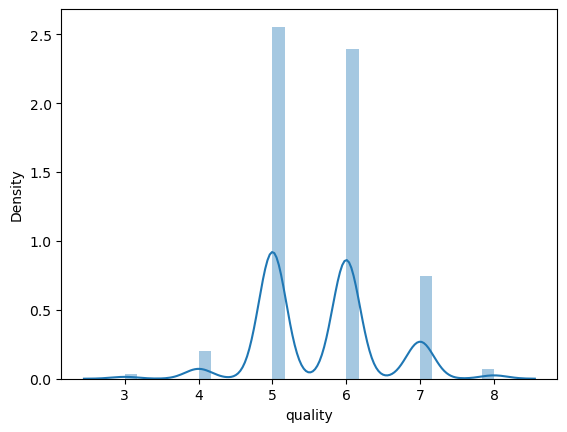

In [113]:
sns.distplot(data['quality'])

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [115]:
# Split the dataset into features and target variable
X = data.drop("quality", axis=1)
y = data["quality"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
winelr = LinearRegression()
winelr.fit(X_train, y_train)

LinearRegression()

In [117]:
winelr.coef_

array([ 2.30853339e-02, -1.00130443e+00, -1.40821461e-01,  6.56431104e-03,
       -1.80650315e+00,  5.62733439e-03, -3.64444893e-03, -1.03515936e+01,
       -3.93687732e-01,  8.41171623e-01,  2.81889567e-01])

In [118]:
y_pred = model.predict(X_test)

In [119]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.39002514396395427


In [120]:
new_wine = np.array([12.8, 2.65, 2.36, 16.6, 100, 2.8, 2.9, 1.3, 3.6, 1.035, 2.6])

# Reshape the new wine's features to match the model's input shape
new_wine = new_wine.reshape(1, -1)

# Predict the quality of the new wine
quality = model.predict(new_wine)
print("Predicted quality:", quality[0])

Predicted quality: -182.1421796332791
